# Wine customer segmentation

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars, belonging to three different customer segments. The analysis determined the quantities of 13 constituents found in each of the three types of wines.



In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)
A = np.array(data)[:,1:].astype(np.float64).T # matrix containing the data (num features x num wines)
labels = np.array(data)[:,0].astype(np.int32) # the label of each wine (i.e. customer segment)
groups = (1,2,3) # customer segments: 1 = low quality; 2 = medium quality; 3 = high quality
features = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols',
            'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity',
            'Hue', 'OD280', 'Proline'] # features descriptions

In [22]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [21]:
A

array([[1.423e+01, 1.320e+01, 1.316e+01, ..., 1.327e+01, 1.317e+01,
        1.413e+01],
       [1.710e+00, 1.780e+00, 2.360e+00, ..., 4.280e+00, 2.590e+00,
        4.100e+00],
       [2.430e+00, 2.140e+00, 2.670e+00, ..., 2.260e+00, 2.370e+00,
        2.740e+00],
       ...,
       [1.040e+00, 1.050e+00, 1.030e+00, ..., 5.900e-01, 6.000e-01,
        6.100e-01],
       [3.920e+00, 3.400e+00, 3.170e+00, ..., 1.560e+00, 1.620e+00,
        1.600e+00],
       [1.065e+03, 1.050e+03, 1.185e+03, ..., 8.350e+02, 8.400e+02,
        5.600e+02]])

# Questions

1. How many features? How many samples? How many samples belong to each customer segment?

In [11]:
print('%d features' % A.shape[0])
print('%d samples'  % A.shape[1])
print('')

for g in groups:
  print('%d wines in customer segment #%s'% (np.sum(labels == g), g))

13 features
178 samples

59 wines in customer segment #1
71 wines in customer segment #2
48 wines in customer segment #3


2. Normalize the data so that each feature has zero mean and unitary standard deviation.

In [12]:
A_norm = (A - np.mean(A, axis = 1)[:,None]) / np.std(A, axis = 1)[:,None]

3. Perform PCA on the dataset by means of the SVD decomposition. Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

Comment on the results.

Text(0.5, 1.0, 'Explained variance')

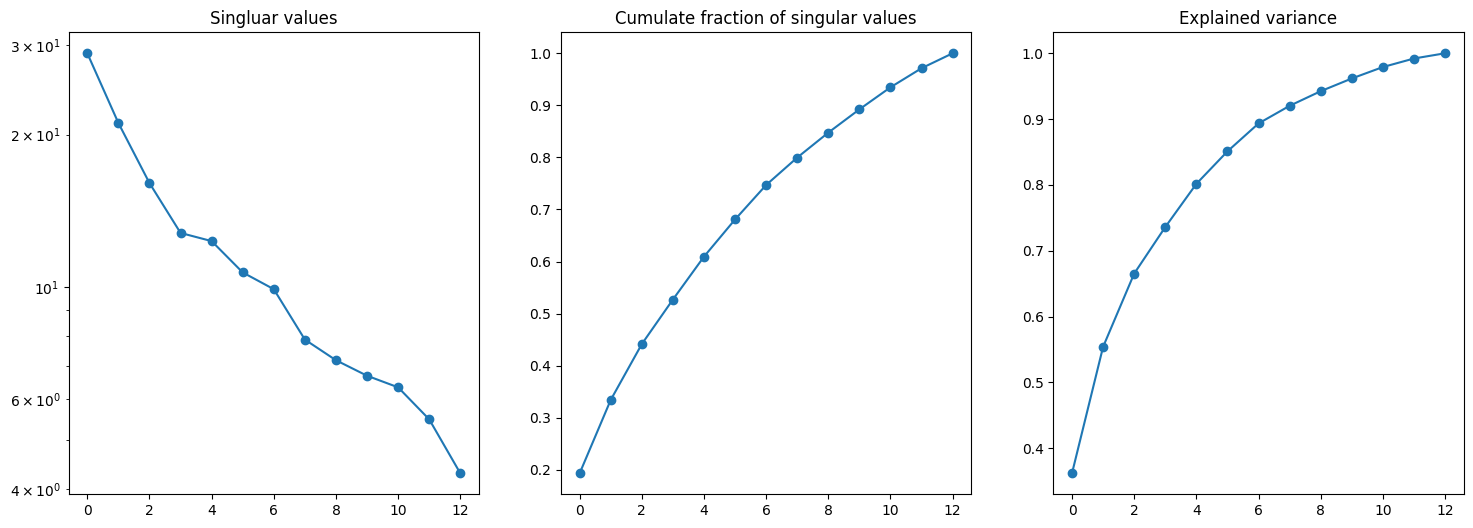

In [13]:
U, s, VT = np.linalg.svd(A_norm, full_matrices = False)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (18,6))

axes[0].semilogy(s, 'o-')
axes[0].set_title('Singluar values')

axes[1].plot(np.cumsum(s)/np.sum(s), 'o-')
axes[1].set_title('Cumulate fraction of singular values')

axes[2].plot(np.cumsum(s**2)/np.sum(s**2), 'o-')
axes[2].set_title('Explained variance')

### Singular Values Plot (Left):
The singular values decrease rapidly, indicating that most of the variation in the dataset is captured by the first few singular values.
This suggests that the data has a low-rank structure, meaning only a few dimensions are needed to explain most of the variance in the data.

### Cumulative Fraction of Singular Values (Middle):
The cumulative fraction of singular values reaches close to 1 after a few values.
This implies that a small number of singular values account for a significant proportion of the total "energy" (sum of singular values) of the dataset.
For example, from the plot, about 5-7 singular values capture the majority of the data's information

### Explained Variance (Right):
The explained variance follows a curve that saturates near 1 as more singular values are included.
This demonstrates that the first few singular values explain the majority of the variance in the dataset.
For instance, if only the first 5-7 singular values are considered, the explained variance exceeds 90%, suggesting dimensionality reduction to 5-7 dimensions may preserve most of the information.

4. Compute a matrix containing the principal components associated with the dataset.

In [14]:
Phi = np.matmul(U.transpose(), A_norm)

In [15]:
Phi.shape

(13, 178)

5. Generate a scatterplot of the first two principal components of the dataset, grouped by label. Draw a line that separates, as well as you manage, the category of low customer segment wines from the rest of the wines (chose intercept and slope of the line by hand, trying to achieve a good result).


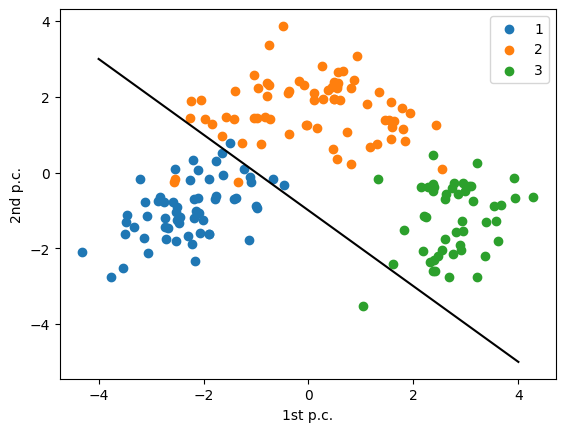

In [16]:
for g in groups:
  plt.scatter(Phi[0, labels == g], Phi[1, labels == g], label = g)
plt.xlabel('1st p.c.')
plt.ylabel('2nd p.c.')
plt.legend()

m = -1
q = -1
x_values = np.linspace(-4, 4)
plt.plot(x_values, m*x_values + q, 'k-')

6. Based on the line of point 4, define a predictor to detect wines of low customer segment. Then, compute the number of true positives (TP), false positives (FP), true negatives (TN), false negatives (FN). Finally, compute
  - sensitivity: (TP) / (TP+FN)
  - specificity: (TN) / (TN+FP)
  - accuracy: (TP+TN) / (TP+TN+FP+FN)

In [20]:
Phi[1, :].shape

(178,)

In [ ]:
# predicts whether each point is "low quality" by checking if it lies below the decision boundary
low_quality_predic = Phi[1, :] < m*Phi[0, :] + q 
# compare labels to determine which points belong to class "low quality"
low_quality_actual = labels <= 1


TP = np.sum(np.logical_and(low_quality_predic == 1, low_quality_actual == 1))
FP = np.sum(np.logical_and(low_quality_predic == 0, low_quality_actual == 1))
TN = np.sum(np.logical_and(low_quality_predic == 0, low_quality_actual == 0))
FN = np.sum(np.logical_and(low_quality_predic == 1, low_quality_actual == 0))
print('true positives:  %d' % TP)
print('false positives: %d' % FP)
print('true negatives:  %d' % TN)
print('false negatives: %d' % FN)
print()
print('sensitivity: %2.1f%%' % (100 * (TP) / (TP+FN)))
print('specificity: %2.1f%%' % (100 * (TN) / (TN+FP)))
print('accuracy: %2.1f%%' % (100 * (TP+TN) / (TP+TN+FP+FN)))

true positives:  56
false positives: 3
true negatives:  115
false negatives: 4

sensitivity: 93.3%
specificity: 97.5%
accuracy: 96.1%
